<a href="https://colab.research.google.com/github/Emd956/Time_series_forecasting_in_Bitcoin_prices/blob/main/10_time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Milestone Project 3: Time series forecasting in TensorFlow (BitPredict💰📈)

The goal of this notebook is to get you familiar with working time series data.

We're going to be building a series of models in an attempt to predict the price of Bitcoin.

Welcome to Milestone Project 3, BitPredict 💰📈!

> 🔑**Note:** ⚠ This is not financial advice, as you'll see time series forecasting for stock market prices is actually quite terrible.


## Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

**Links:**
  * All resources: https://github.com/mrdbourke/tensorflow-deep-learning/
  * Book version of actual code/text: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb


## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-07-31 00:40:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-07-31 00:40:38 (7.76 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Tipically deep learning usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

<Axes: title={'center': 'Bitcoin Price'}, xlabel='Date'>

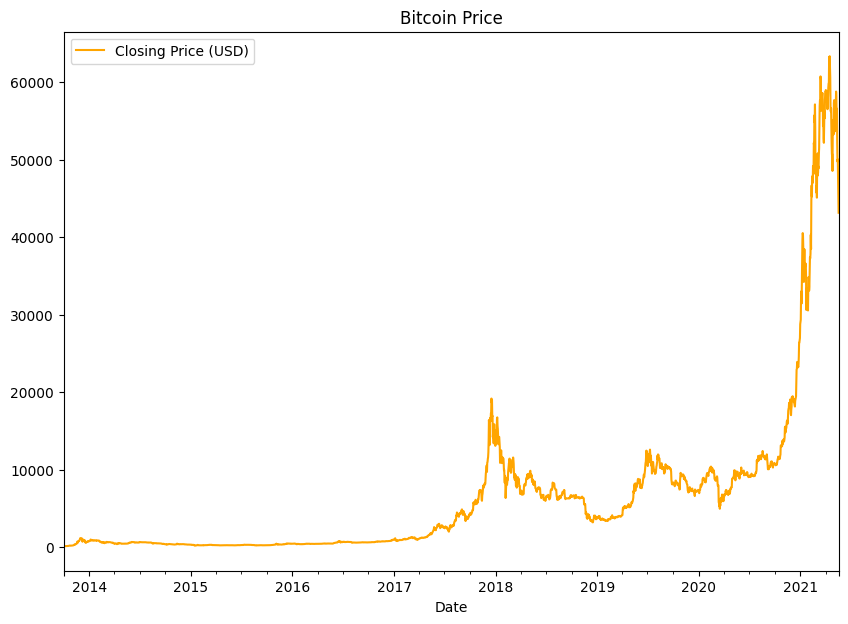

In [6]:
df.plot(y="Closing Price (USD)", figsize=(10, 7), color="orange", title="Bitcoin Price")

In [7]:
# Load data part 2
df_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TensorFlow ZTM/BTC-USD (2014-2024).csv",
                   parse_dates=["Date"],
                   index_col=["Date"])
df_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [8]:
# Get only missing dates from df_2
df_2_index = df_2.index.difference(df.index)
df_2 = df_2.reindex(df_2_index)
# Delete Close and Volume
df_2.drop(["Close", "Volume"], axis=1, inplace=True)
# Add Currency column
df_2["Currency"] = "BTC"
# Rename columns
df_2 = df_2.rename(columns={"Adj Close": "Closing Price (USD)", "Open": "24h Open (USD)", "High": "24h High (USD)", "Low": "24h Low (USD)"})
# Reorder columns of df_2 as equal as df
df_2 = df_2.loc[:, ["Currency", "Closing Price (USD)", "24h Open (USD)", "24h High (USD)", "24h Low (USD)"]]
df_2.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-19,BTC,37002.441406,42944.976563,43546.117188,30681.496094
2021-05-20,BTC,40782.738281,36753.667969,42462.984375,35050.617188
2021-05-21,BTC,37304.691406,40596.949219,42172.171875,33616.453125
2021-05-22,BTC,37536.632813,37371.031250,38831.054688,35383.683594
2021-05-23,BTC,34770.582031,37531.449219,38289.218750,31227.339844


In [9]:
# Add df_2 into df using pd.concat
df = pd.concat([df, df_2[:-2]])
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2024-01-15,BTC,42511.968750,41715.066406,43319.722656,41705.417969
2024-01-16,BTC,43154.945313,42499.335938,43566.273438,42085.996094
2024-01-17,BTC,42742.652344,43132.101563,43189.890625,42189.308594
2024-01-18,BTC,41262.058594,42742.312500,42876.347656,40631.171875
2024-01-19,BTC,41618.406250,41278.460938,42134.160156,40297.457031


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3763 entries, 2013-10-01 to 2024-01-19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             3763 non-null   object 
 1   Closing Price (USD)  3763 non-null   float64
 2   24h Open (USD)       3763 non-null   float64
 3   24h High (USD)       3763 non-null   float64
 4   24h Low (USD)        3763 non-null   float64
dtypes: float64(4), object(1)
memory usage: 176.4+ KB


In [11]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


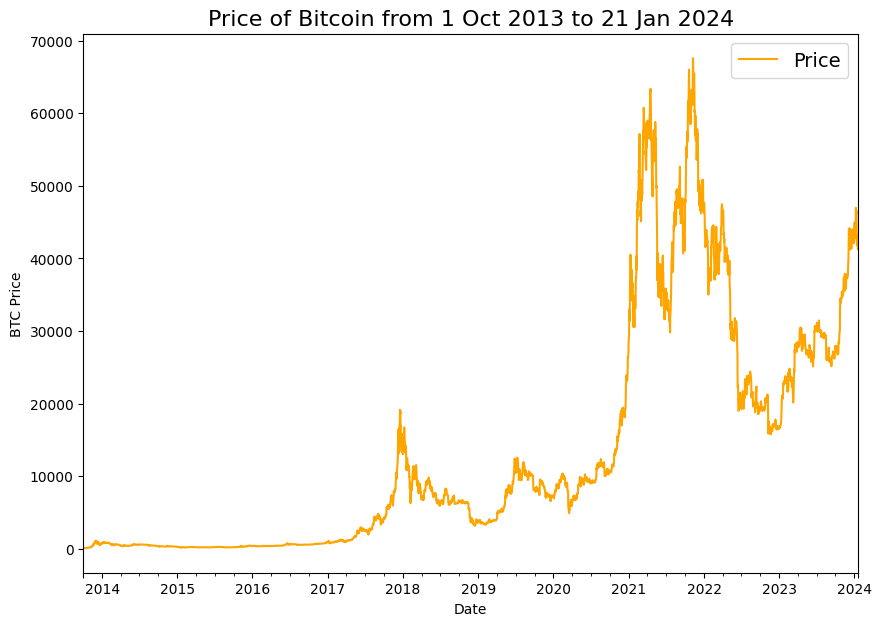

In [12]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7), color="orange")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 21 Jan 2024", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [13]:
# df.to_csv("/content/drive/MyDrive/Colab Notebooks/TensorFlow ZTM/Bitcoin_prices_complete_2013_2024.csv")

In [14]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/drive/MyDrive/Colab Notebooks/TensorFlow ZTM/Bitcoin_prices_complete_2013_2024.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

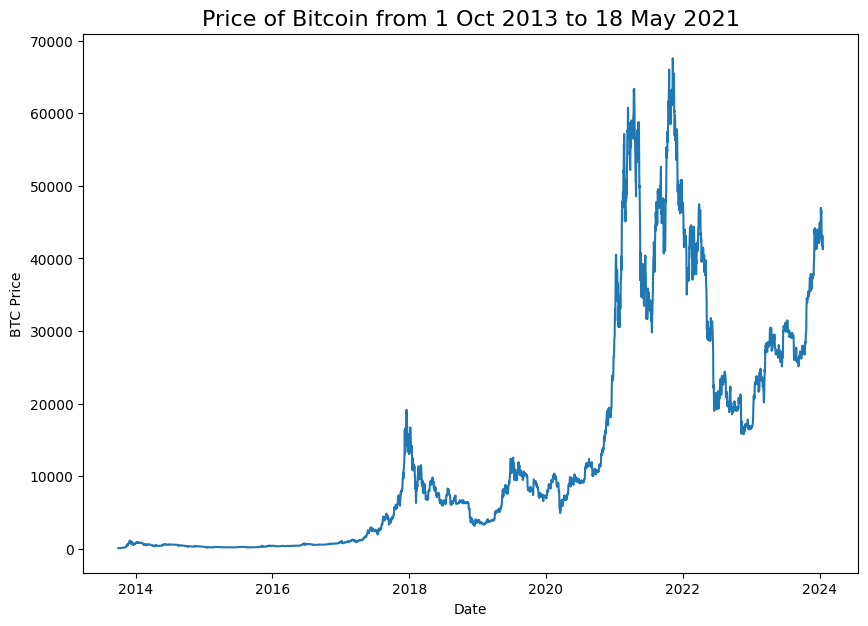

In [15]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong day)

In [16]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [17]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [18]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3010,), (753,), (3010,), (753,))

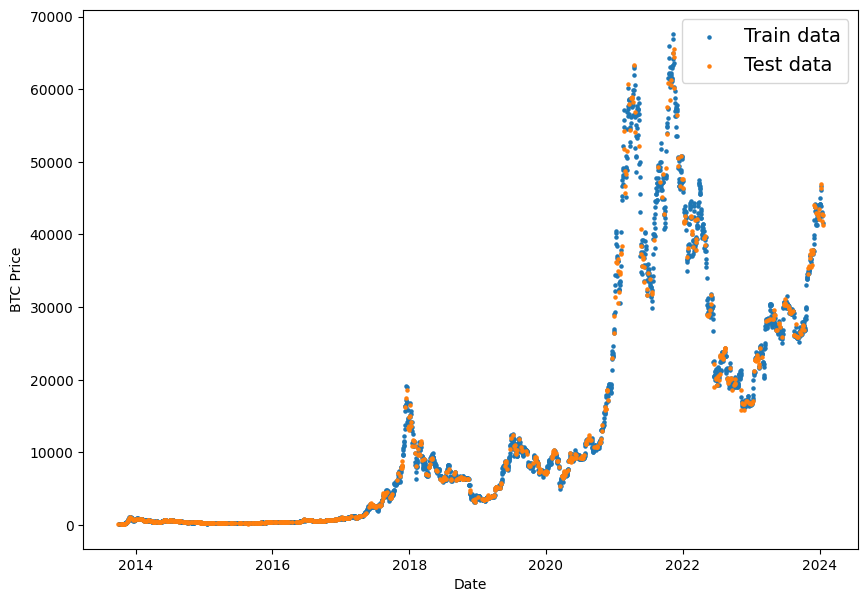

In [19]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create train & test sets for time series (the right way)

In [20]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the splits)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything before the splits)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(3010, 753, 3010, 753)

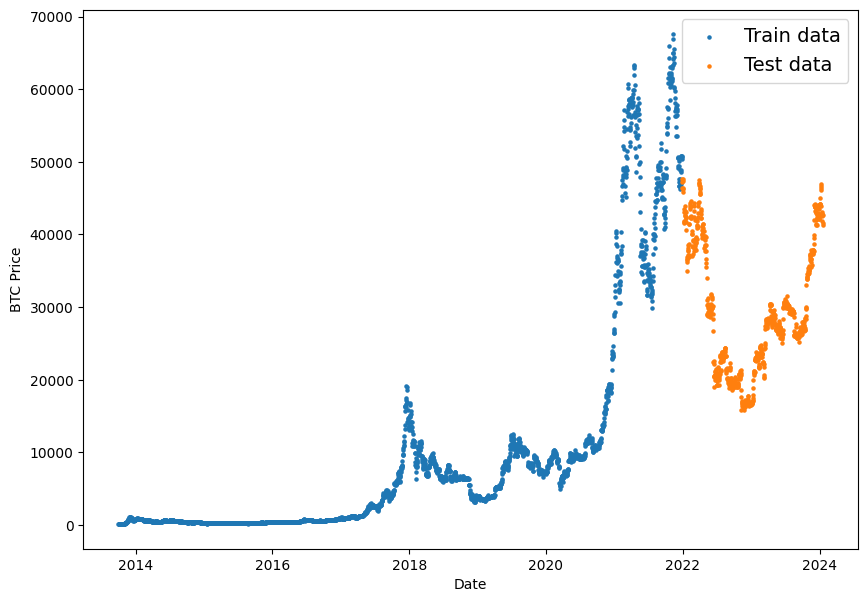

In [21]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [22]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values
  label : label to show on plot of values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

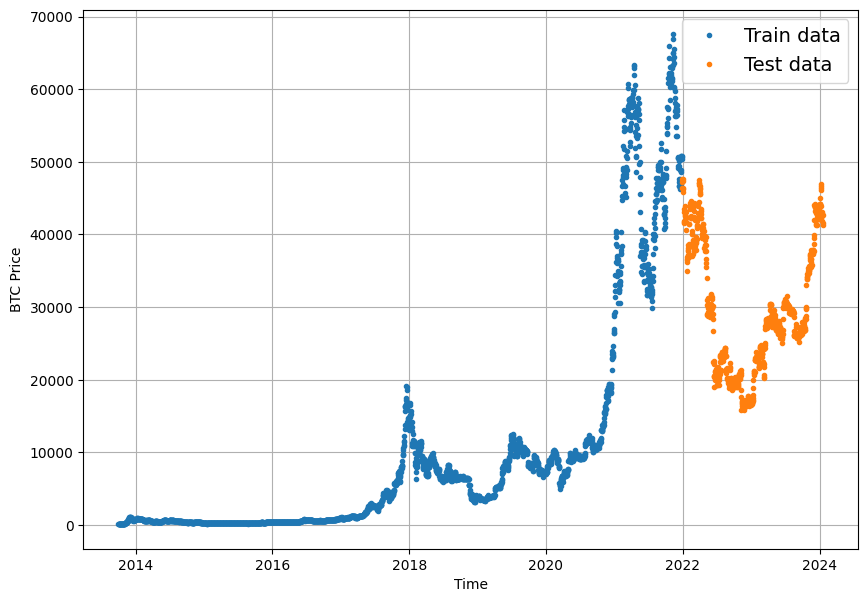

In [23]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizons** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:
* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1	, horizon = 1, window = 30
* 3	Same as 1, horizon = 7, window = 30
* 4	Conv1D,	horizon = 1, window = 7
* 5	LSTM,	horizon = 1, window = 7
* 6	Same as 1 (but with multivariate data),	horizon = 1, window = 7
* 7	N-BEATs Algorithm,	horizon = 1, window = 7
* 8	Ensemble (multiple models optimized on different loss functions), horizon = 1, window = 7
* 9	Future prediction model (model to predict future values), horizon = 1, window = 7
* 10	Same as 1 (but with turkey 🦃 data introduced), horizon = 1, window = 7

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [24]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([47588.855469, 46444.710938, 47178.125   , 46306.445313,
        47686.8125  , 47345.21875 , 46458.117188, 45897.574219,
        43569.003906, 43160.929688]),
 array([46139.730469, 46627.777344, 46368.585938, 42853.167969,
        42842.382813, 41796.269531, 42511.96875 , 43154.945313,
        42742.652344, 41262.058594]))

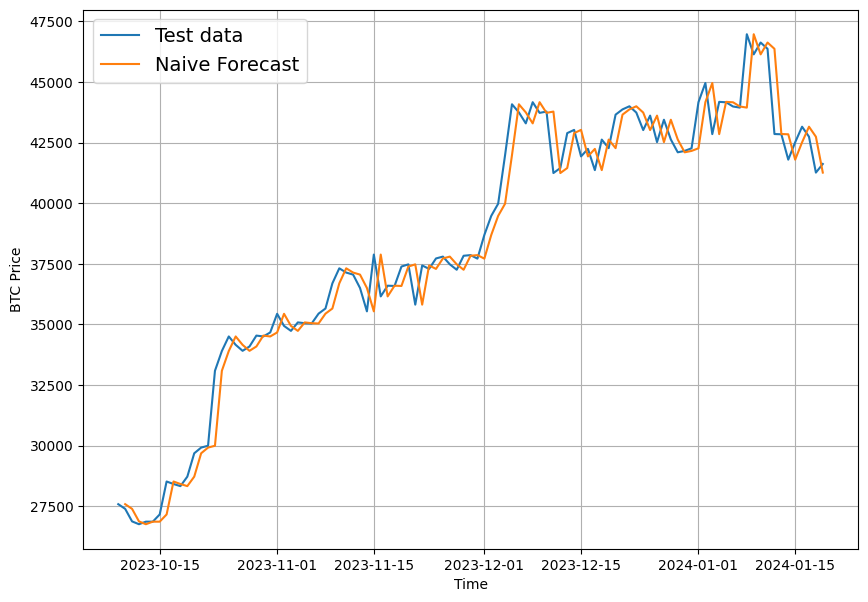

In [25]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=650, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=650, format="-", label="Naive Forecast")

> 🛠 **Exercise:** Spend 10 minutes reading the [simple forecast chapter of Forecasting: Principles in Practice](https://otexts.com/fpp3/index.html)
and find out why the naive forecast is hard to beat, does the term augoregressive come up?

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecast (y_pred) compare against the actual values (y_true or ground truth values)?**

> 📖**Resource:** For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html)

In [26]:
import tensorflow as tf

In [27]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [28]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

1.0013965848497717

In [29]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  Perform evaluation metrics on y_true labels vs. y_pred labels on the test set
  """
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluations metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works...

In [30]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 558.8356,
 'mse': 761443.56,
 'rmse': 872.60736,
 'mape': 1.9034779,
 'mase': 1.0013967}

In [31]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=29012.66112381142>

In [32]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=15787.28418>,
 <tf.Tensor: shape=(), dtype=float64, numpy=47686.8125>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [33]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [34]:
# What we want to do with out Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [35]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [36]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [37]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/user/basics.indexing.html.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

> 📖**Resource:** The function we're about to create has been adapted from the following article:
https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [38]:
import numpy as np

# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # print(f"Window step:\n {window_step}\n")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T # create 2D array of windows of size window_size

  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}\n")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # print(f"Windowed array:\n {windowed_array}\n")

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [39]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels), len(prices)

(3756, 3756, 3763)

In [40]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [41]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Horizon: {full_labels[i-3]}")

Window: [46627.777344 46368.585938 42853.167969 42842.382813 41796.269531
 42511.96875  43154.945313] -> Horizon: [42742.652344]
Window: [46368.585938 42853.167969 42842.382813 41796.269531 42511.96875
 43154.945313 42742.652344] -> Horizon: [41262.058594]
Window: [42853.167969 42842.382813 41796.269531 42511.96875  43154.945313
 42742.652344 41262.058594] -> Horizon: [41618.40625]


> 🔑**Note:** There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

In [42]:
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(data=prices[:-HORIZON], targets=prices[WINDOW_SIZE:], sequence_length=7)

for batch in dataset:
  inputs, targets = batch
  print(f"Last input from batch: {inputs[0]}")
  print(f"Last target from batch: {targets[0]}")

Last input from batch: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
Last target from batch: 123.033
Last input from batch: [802.75333 748.43559 692.66914 668.86463 700.44843 694.3125  665.7975 ]
Last target from batch: 645.615
Last input from batch: [588.52333 570.28833 589.06666 592.25666 610.41333 601.88666 594.09333]
Last target from batch: 582.04499
Last input from batch: [381.72375 380.0575  382.93875 376.59    351.7825  353.6325  345.1925 ]
Last target from batch: 350.9775
Last input from batch: [238.15225 235.67716 251.28908 251.03416 251.9314  258.8485  270.7625 ]
Last target from batch: 278.1172
Last input from batch: [255.52675 253.87887 261.42899 267.60762 270.07587 264.356   267.943  ]
Last target from batch: 269.24925
Last input from batch: [387.775 370.652 376.948 311.702 320.036 337.893 334.125]
Last target from batch: 333.951
Last input from batch: [416.034 414.167 417.138 417.154 407.473 409.24  407.496]
Last target from batch: 415.125
Last i

## Turning windows into training and test sets

In [43]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1 - test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [44]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3004, 752, 3004, 752)

In [45]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [46]:
test_windows[:5], test_labels[:5]

(array([[48628.511719, 50784.539063, 50822.195313, 50429.859375,
         50809.515625, 50640.417969, 47588.855469],
        [50784.539063, 50822.195313, 50429.859375, 50809.515625,
         50640.417969, 47588.855469, 46444.710938],
        [50822.195313, 50429.859375, 50809.515625, 50640.417969,
         47588.855469, 46444.710938, 47178.125   ],
        [50429.859375, 50809.515625, 50640.417969, 47588.855469,
         46444.710938, 47178.125   , 46306.445313],
        [50809.515625, 50640.417969, 47588.855469, 46444.710938,
         47178.125   , 46306.445313, 47686.8125  ]]),
 array([[46444.710938],
        [47178.125   ],
        [46306.445313],
        [47686.8125  ],
        [47345.21875 ]]))

In [47]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON]), y_train[WINDOW_SIZE:])

True

In [48]:
len(train_labels), len(y_train), len(prices)*0.8

(3004, 3010, 3010.4)

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [49]:
import os

# Create a function to implement ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learns by its own

In [50]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"), # input layer
    layers.Dense(HORIZON, activation="linear") # output layer - linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
24/24 [==============================] - 3s 47ms/step - loss: 3984.7297 - mae: 3984.7297 - mse: 85885600.0000 - val_loss: 4567.0234 - val_mae: 4567.0234 - val_mse: 24493960.0000
Epoch 2/100
24/24 [==============================] - 1s 31ms/step - loss: 673.7558 - mae: 673.7558 - mse: 2411401.0000 - val_loss: 1334.0138 - val_mae: 1334.0138 - val_mse: 2937374.2500
Epoch 3/100
24/24 [==============================] - 1s 29ms/step - loss: 423.3582 - mae: 423.3582 - mse: 1013980.1875 - val_loss: 861.7098 - val_mae: 861.7098 - val_mse: 1536334.6250
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 416.5525 - mae: 416.5524 - mse: 980742.7500 - val_loss: 1128.8953 - val_mae: 1128.8953 - val_mse: 2274214.2500
Epoch 5/100
24/24 [==============================] - 1s 30ms/step - loss: 395.6855 - mae: 395.6855 - mse: 881131.3125 - val_loss: 821.8967 - val_mae: 821.8967 - val_mse: 1475691.2500
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss:

In [51]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 598.9133 - mae: 598.9133 - mse: 818660.8750


[598.9132690429688, 598.9132690429688, 818660.875]

In [52]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 575.1191 - mae: 575.1191 - mse: 798415.1250


[575.1190795898438, 575.1190795898438, 798415.125]

## Making forecasts with a model (on the test dataset)

To make "forecast" on the test dataset (note: these won't be actual forecast, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [53]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [54]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

24/24 [==============================] - 0s 1ms/step


(752,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([48189.734, 46572.055, 46999.992, 46264.82 , 47236.074, 47461.465,
        46542.984, 46099.562, 43985.516, 43101.324], dtype=float32)>)

In [55]:
test_labels.shape, model_1_preds.shape

((752, 1), TensorShape([752]))

In [56]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 575.11896,
 'mse': 798415.1,
 'rmse': 893.5408,
 'mape': 1.95977,
 'mase': 1.0305754}

In [57]:
naive_results

{'mae': 558.8356,
 'mse': 761443.56,
 'rmse': 872.60736,
 'mape': 1.9034779,
 'mase': 1.0013967}

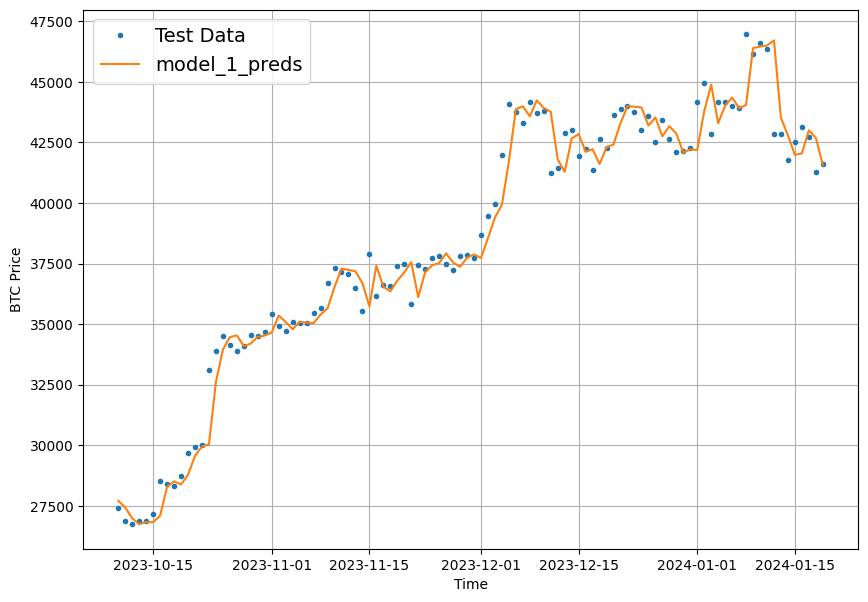

In [58]:
# Let's plot our model 1 predictions
offset = 650
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [59]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [60]:
# Make windowed data with appropiate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels), len(prices)

(3733, 3733, 3763)

In [61]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2986, 747, 2986, 747)

In [62]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [63]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 602.4979 - mae: 602.4979 - mse: 859003.6875


[602.4979248046875, 602.4979248046875, 859003.6875]

In [64]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 602.4979 - mae: 602.4979 - mse: 859003.6875


[602.4979248046875, 602.4979248046875, 859003.6875]

In [65]:
# Get forecast predictions
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47501.426, 46582.723, 46121.395, 44217.8  , 43136.91 , 41815.023,
       41407.195, 41524.34 , 41599.84 , 42333.508], dtype=float32)>

In [66]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 602.4979,
 'mse': 859003.7,
 'rmse': 926.8245,
 'mape': 2.0719776,
 'mase': 1.0833421}

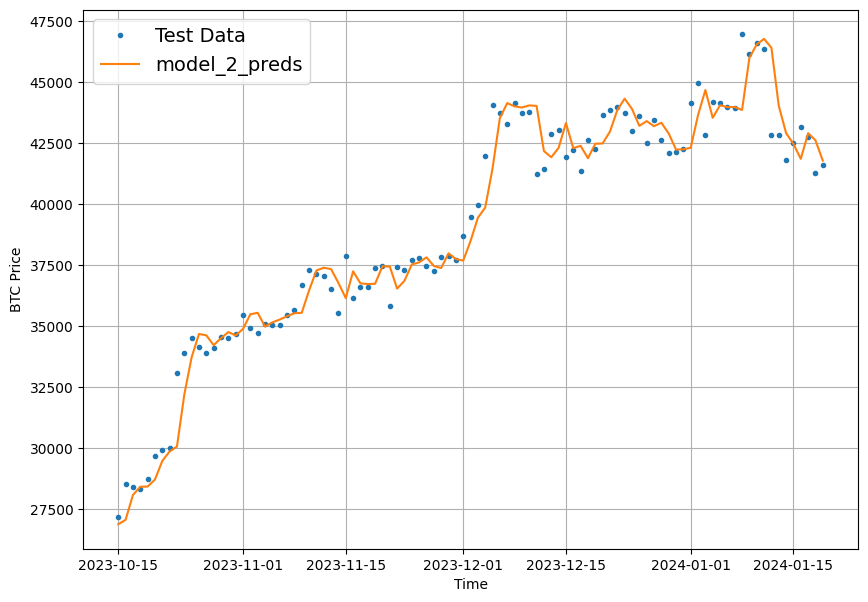

In [67]:
# Plot
offset = 650
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [68]:
HORIZON = 7
WINDOW_SIZE = 30

# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3727, 3727)

In [69]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2981, 746, 2981, 746)

In [70]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [71]:
# Evaluate model on the test data
model_3.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 1254.5751


1254.5750732421875

In [72]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 1220.9424


1220.9423828125

In [73]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:3]

24/24 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[48062.906, 48982.38 , 48062.625, 48249.04 , 49112.113, 48562.742,
        49047.965],
       [45974.074, 47402.48 , 47016.285, 46215.18 , 47065.75 , 46462.16 ,
        46842.29 ],
       [46300.55 , 44998.336, 45878.336, 45040.03 , 46785.684, 45647.164,
        45006.26 ]], dtype=float32)>

In [74]:
test_labels.shape, model_3_preds.shape

((746, 7), TensorShape([746, 7]))

In [75]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([1823.2522 , 1220.8795 , 1484.4202 , 2257.241  , 2957.6401 ,
        3628.5798 , 4052.0894 , 3794.8923 , 1306.6256 ,  675.4481 ,
         913.94366, 1835.3119 , 1799.4102 , 1745.9978 ,  873.3817 ,
         929.5179 ,  990.42914, 1746.1478 , 2697.193  , 3561.2566 ,
        3830.7278 , 4640.7173 , 4540.472  , 4402.962  , 1410.7528 ,
        1424.6708 , 2104.6523 , 2026.2137 , 1516.2294 , 1627.158  ,
        1603.4442 , 1343.8956 , 1535.1356 , 2286.0564 , 3013.6965 ,
        3587.7327 , 4935.6704 , 6212.325  , 3702.4348 , 2012.9073 ,
        1039.9928 ,  757.5201 , 1169.8008 , 1301.0491 , 1264.3147 ,
        1246.347  , 2056.52   , 2301.284  , 2805.0144 , 3879.6775 ,
        4972.6514 , 3535.309  , 2215.5608 , 1227.217  ,  773.3482 ,
        1517.0798 , 2801.7952 , 3640.6936 , 3268.2952 , 2950.5552 ,
        2976.3894 , 3269.8716 , 2445.7292 , 3362.1501 , 4412.5894 ,
        4400.7573 , 1903.0697 , 1232.3627 , 1139.2467 , 1635.3186 ,
        1668.9889 , 1499.2533 , 1265.99  

## Make our evaluation function work for larger horizons

In [76]:
model_3_results["mae"].ndim, model_2_results["mae"].ndim

(1, 0)

In [77]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  Perform evaluation metrics on y_true labels vs. y_pred labels on the test set
  """
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluations metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [78]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1220.9424,
 'mse': 3400064.2,
 'rmse': 1410.7928,
 'mape': 4.226152,
 'mase': 2.1952393}

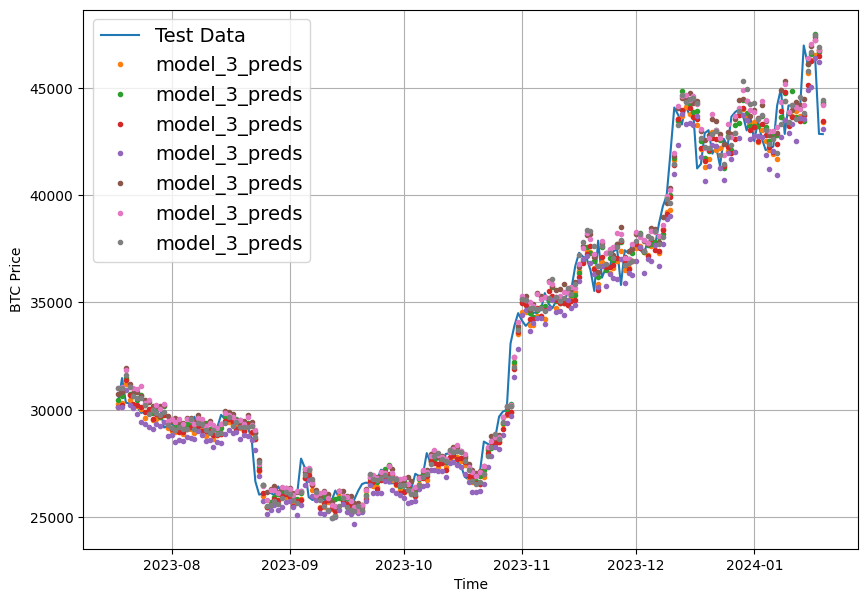

In [79]:
# Plot
offset=560
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label="model_3_preds")

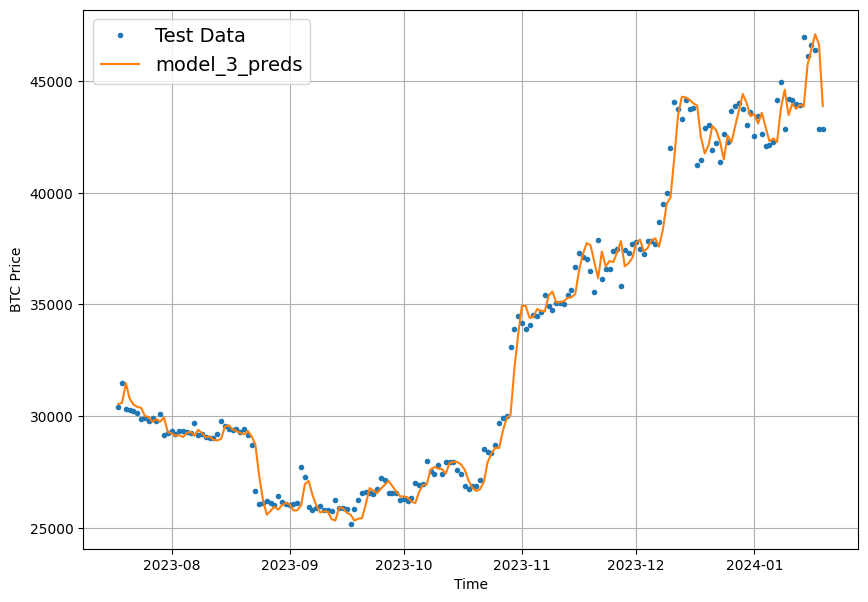

In [80]:
offset=560
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

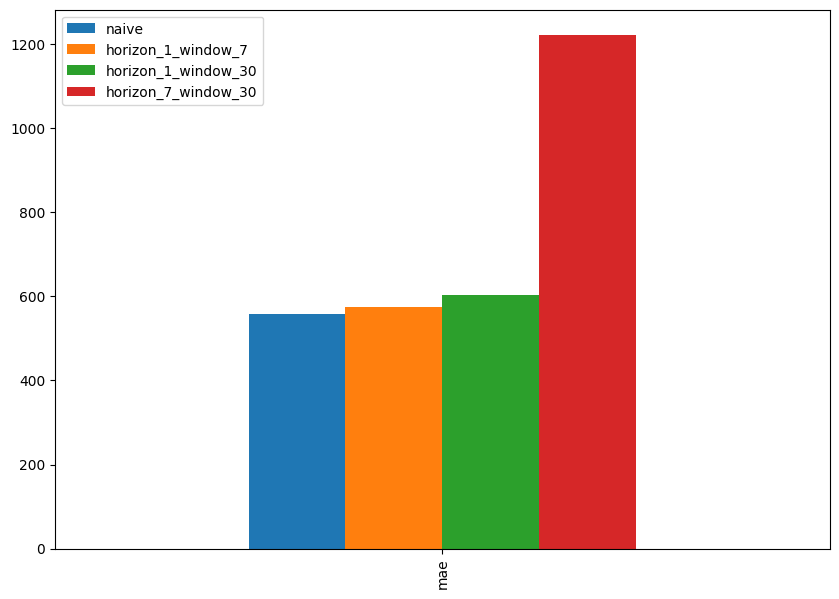

In [81]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar");

> 🔑**Note:** You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often seem autocorrelated but ofren fluctuate randomly), a naive model will often get fairly good results.

> 📖**Resource:** For more on how autocorrelation influences a model's predictions, see the article [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik.](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)


## Model 4: Conv1D

In [82]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [83]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3756, 3756)

In [84]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3004, 752, 3004, 752)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [85]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [86]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [87]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))  # add an extra dimension for `input_dim`

In [88]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expand shape:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expand shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [89]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
24/24 [==============================] - 3s 35ms/step - loss: 3647.6848 - val_loss: 4177.6216
Epoch 2/100
24/24 [==============================] - 1s 23ms/step - loss: 686.3672 - val_loss: 1400.6117
Epoch 3/100
24/24 [==============================] - 1s 23ms/step - loss: 501.2590 - val_loss: 979.2165
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 487.9716 - val_loss: 1077.5240
Epoch 5/100
24/24 [==============================] - 1s 25ms/step - loss: 468.8158 - val_loss: 978.6422
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 465.5752 - val_loss: 988.3500
Epoch 7/100
24/24 [==============================] - 1s 24ms/step - loss: 457.3910 - val_loss: 960.6944
Epoch 8/100
24/24 [==============================] - 1s 24ms/step - loss: 452.0792 - val_loss: 918.5303
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 446.0591 - val_loss: 922.8913
Epoch 10/100
24/24 [==============================] - 1s 24ms/s

In [90]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# Evaluate model_4
model_4.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 4ms/step - loss: 570.8798


570.8798217773438

In [92]:
# Load back in best performing Conv1D model and re-evaluate
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 570.8798


570.8798217773438

In [93]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([48245.867, 46590.004, 46880.04 , 46319.65 , 47280.453, 47291.895,
       46618.977, 46030.656, 43961.19 , 43172.168], dtype=float32)>

In [94]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.87976,
 'mse': 790955.06,
 'rmse': 889.3565,
 'mape': 1.9470221,
 'mase': 1.022979}

In [95]:
model_1_results

{'mae': 575.11896,
 'mse': 798415.1,
 'rmse': 893.5408,
 'mape': 1.95977,
 'mase': 1.0305754}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [96]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, activation="relu")(x)
x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
24/24 [==============================] - 4s 75ms/step - loss: 7703.0527 - val_loss: 13459.0703
Epoch 2/100
24/24 [==============================] - 2s 81ms/step - loss: 2005.2517 - val_loss: 3234.3362
Epoch 3/100
24/24 [==============================] - 2s 80ms/step - loss: 689.6247 - val_loss: 1077.8268
Epoch 4/100
24/24 [==============================] - 2s 98ms/step - loss: 533.9569 - val_loss: 987.9016
Epoch 5/100
24/24 [==============================] - 0s 12ms/step - loss: 506.5150 - val_loss: 1489.6870
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 545.1721 - val_loss: 1249.8801
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 532.1813 - val_loss: 1091.7598
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 533.6129 - val_loss: 1041.9482
Epoch 9/100
24/24 [==============================] - 0s 7ms/step - loss: 516.6943 - val_loss: 1163.8843
Epoch 10/100
24/24 [==============================] - 0s 

In [97]:
# Model 5 summary
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 1, 128)            69632     
                                                                 
 dense_7 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# Evaluate model_5
model_5.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 607.1602


607.1602172851562

In [99]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 607.1602


607.1602172851562

In [100]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([48684.918, 46738.953, 46715.227, 46287.656, 46797.75 , 47061.727,
       46744.215, 46052.547, 44308.203, 43215.23 ], dtype=float32)>

In [101]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 607.16034,
 'mse': 858212.44,
 'rmse': 926.3976,
 'mape': 2.0668814,
 'mase': 1.0879915}

> 🔑**Note:** Because neural network are such powerful algorithms, they can be used for almost any problem any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Enrique Mendoza tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the Bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [102]:
# Let's make a multivariate time series
bitcoin_prices.tail()

,Price
Date,
2024-01-15,42511.968750
2024-01-16,43154.945313
2024-01-17,42742.652344
2024-01-18,41262.058594
2024-01-19,41618.406250


In [103]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020
block_reward_5 = 3.125 # 19 April 2024

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")
block_reward_5_datetime = np.datetime64("2024-03-19")

In [104]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_4_days = (block_reward_5_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days, block_reward_4_days

(1012, 2421, 3822)

In [105]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days, -1] = block_reward_4

In [106]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [107]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2024-01-15,42511.968750,6.25
2024-01-16,43154.945313,6.25
2024-01-17,42742.652344,6.25
2024-01-18,41262.058594,6.25
2024-01-19,41618.406250,6.25


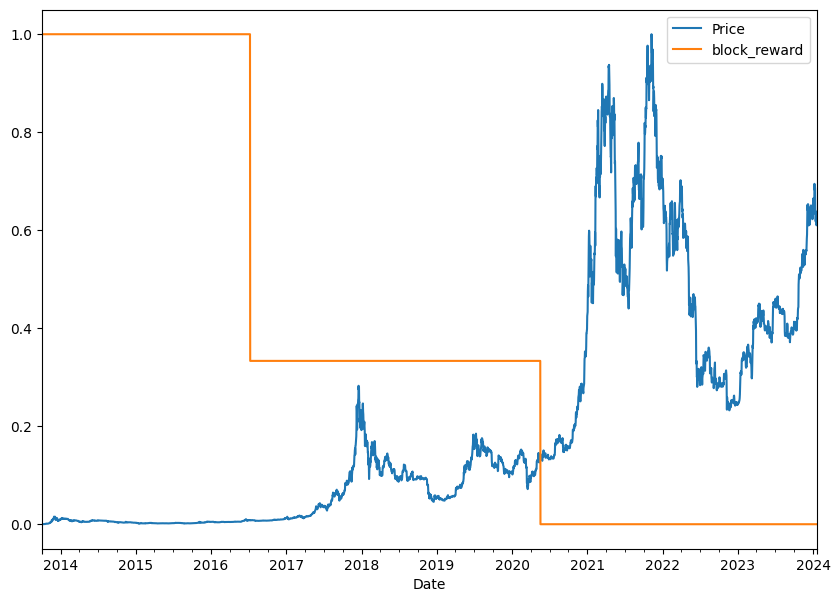

In [108]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've now got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [109]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [110]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [111]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [112]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [113]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(3004, 3004, 752, 752)

## Model 6: Dense (multivariate time series)

In [114]:
tf.random.set_seed(42)

# Create multivariate time series Dense model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6_dense_multivariate")

# Compile model 6
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
24/24 [==============================] - 1s 22ms/step - loss: 6604.8438 - val_loss: 2819.8538
Epoch 2/100
24/24 [==============================] - 0s 18ms/step - loss: 1060.2845 - val_loss: 1338.5254
Epoch 3/100
24/24 [==============================] - 0s 18ms/step - loss: 579.3116 - val_loss: 1300.8905
Epoch 4/100
24/24 [==============================] - 0s 18ms/step - loss: 556.2434 - val_loss: 1119.9817
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 536.4545 - val_loss: 1148.8787
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 530.5214 - val_loss: 1135.2212
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 518.6807 - val_loss: 1129.8315
Epoch 8/100
24/24 [==============================] - 0s 18ms/step - loss: 503.3970 - val_loss: 1039.6628
Epoch 9/100
24/24 [==============================] - 0s 18ms/step - loss: 491.8697 - val_loss: 1023.8782
Epoch 10/100
24/24 [==============================] - 0s

In [115]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 629.9249


629.9249267578125

In [116]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 565.4384


565.4383544921875

In [117]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

24/24 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([48016.613, 46628.39 , 47026.316, 46303.19 , 47352.39 , 47305.05 ,
       46650.4  , 45972.586, 43934.336, 43196.832], dtype=float32)>

In [118]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.43835,
 'mse': 778468.75,
 'rmse': 882.3088,
 'mape': 1.9271694,
 'mase': 1.0132284}

In [119]:
model_1_results

{'mae': 575.11896,
 'mse': 798415.1,
 'rmse': 893.5408,
 'mape': 1.95977,
 'mase': 1.0305754}

In [120]:
naive_results

{'mae': 558.8356,
 'mse': 761443.56,
 'rmse': 872.60736,
 'mape': 1.9034779,
 'mase': 1.0013967}

For a challenge on different ways to potentially improve the multivariate time series model, see the reference here:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#model-6-dense-multivariate-time-series

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [121]:
# Create NBEAT'sBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name, etc)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

Let's test our NBeatsBlock class

To do we'll make some dummy inputs and outputs

In [122]:
# Set up dummy NBeatsBlock layer to
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [123]:
# Create dummy inputs (have to be same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [124]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.17263746  0.7256782  -0.11422348 -0.7036257   0.0043931  -0.19558927
  0.13463672]
Forecast: 0.47350555658340454


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data to load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: https://www.tensorflow.org/guide/data_performance

In [125]:
HORIZON = 1
WINDOW_SIZE = 7

In [126]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [127]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [128]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(3004, 3004, 752, 752)

In [129]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labgels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithms has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [130]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for the residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

for more on resifual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [131]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to craete stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs togehter using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MEA to keep it inline with or other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [132]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # First stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f"NBeatsBlock_{i}")(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 367: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1183: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1283: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 20s, sys: 9.05 s, total: 5min 29s
Wall time: 6min 56s


In [133]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 30ms/step - loss: 557.6588


557.6587524414062

In [134]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47899.824, 46560.207, 47142.25 , 46424.76 , 47511.04 , 47190.19 ,
       46515.832, 45966.742, 43712.168, 43298.58 ], dtype=float32)>

In [135]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 557.65875,
 'mse': 764924.5,
 'rmse': 874.5996,
 'mape': 1.9014599,
 'mase': 0.9992879}

In [136]:
model_1_results, naive_results

({'mae': 575.11896,
  'mse': 798415.1,
  'rmse': 893.5408,
  'mape': 1.95977,
  'mase': 1.0305754},
 {'mae': 558.8356,
  'mse': 761443.56,
  'rmse': 872.60736,
  'mape': 1.9034779,
  'mase': 1.0013967})

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATs model doesn't perform as well as model_1 or the original naive forecast

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

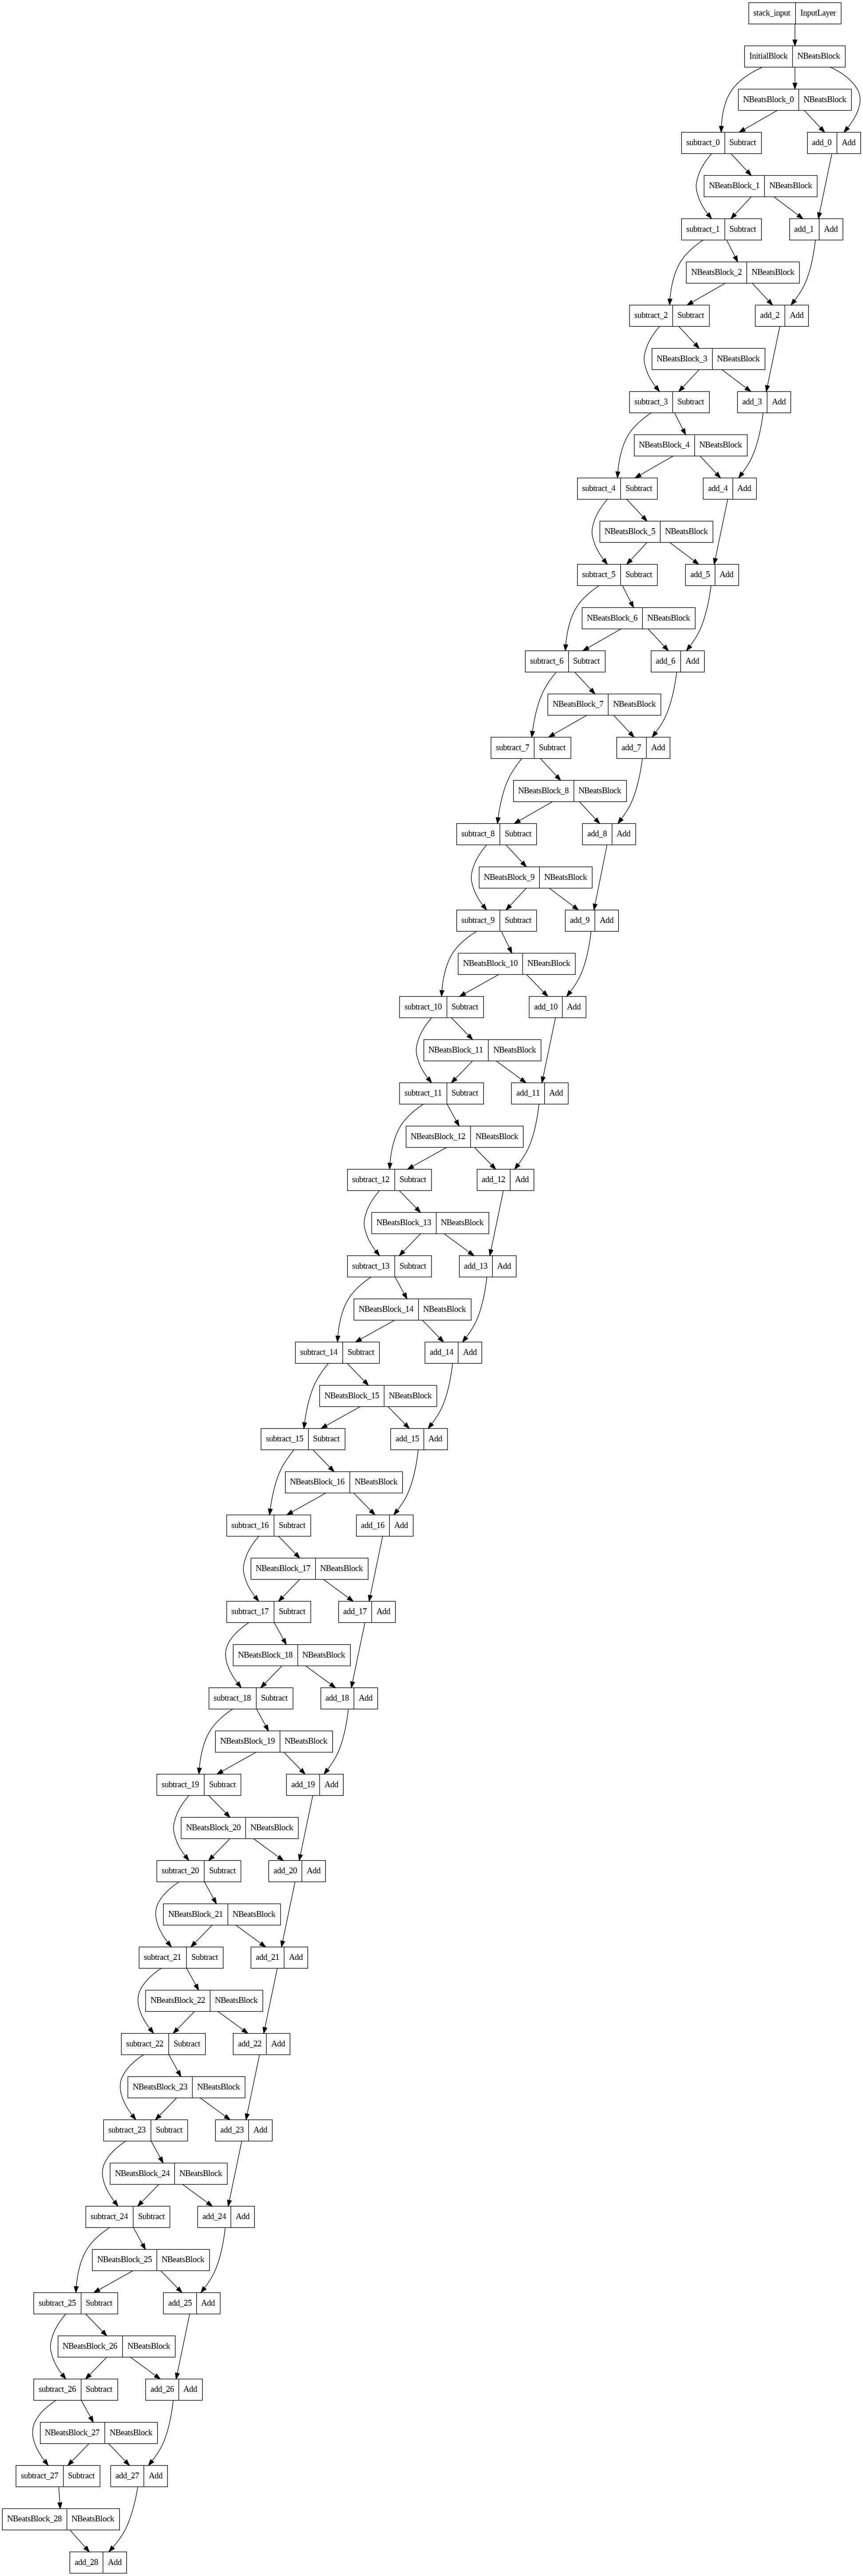

In [137]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=False)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

In [138]:
HORIZON, WINDOW_SIZE

(1, 7)

## Constructing and fitting and ensemble of models (using different loss functions)

In [139]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(horizon)
          ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                factor=0.1,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [140]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 259: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 644: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 221: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 652: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 752: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 522: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 622: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 178: ReduceLROnPlateau reduci

In [141]:
len(ensemble_models)

15

In [142]:
ensemble_models

### Make predictions with our ensemble model

In [143]:
# Create a function which uses a list of trained models and returns a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [144]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 136ms/step
CPU times: user 939 ms, sys: 38.5 ms, total: 978 ms
Wall time: 1.58 s


<tf.Tensor: shape=(15, 752), dtype=float32, numpy=
array([[47765.9  , 46720.95 , 46963.688, ..., 43032.816, 42450.477,
        41388.355],
       [47801.473, 46417.1  , 46994.89 , ..., 42931.562, 42754.254,
        41344.21 ],
       [47761.746, 46393.004, 46920.797, ..., 43050.133, 42451.87 ,
        41272.508],
       ...,
       [47749.07 , 46628.32 , 47344.836, ..., 42660.516, 41859.516,
        41076.29 ],
       [47631.66 , 46422.723, 46999.41 , ..., 42918.832, 41870.793,
        41313.336],
       [47773.895, 46407.305, 46953.86 , ..., 43002.39 , 42555.61 ,
        41368.617]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into **point predictions** we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [145]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47553.375, 46248.26 , 46735.16 , 45988.277, 47217.348, 46934.66 ,
       46151.91 , 45663.383, 43365.082, 42959.973], dtype=float32)>

In [146]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([47749.07 , 46417.1  , 46963.688, 46224.902, 47504.19 , 47203.055,
       46371.027, 45905.39 , 43478.055, 43124.242], dtype=float32)

In [147]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 585.0521,
 'mse': 792160.9,
 'rmse': 890.0342,
 'mape': 1.9874201,
 'mase': 1.048375}

In [148]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 563.627,
 'mse': 768981.25,
 'rmse': 876.9158,
 'mape': 1.9182662,
 'mase': 1.0099826}

In [149]:
model_7_results

{'mae': 557.65875,
 'mse': 764924.5,
 'rmse': 874.5996,
 'mape': 1.9014599,
 'mase': 0.9992879}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediciton intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the predictions interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/

In [150]:
# Find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [151]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([46124.266, 44551.016, 44801.93 , 44269.74 , 45270.1  , 45200.766,
        44543.277, 43702.688, 42127.3  , 41317.62 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([48982.484, 47945.508, 48668.39 , 47706.816, 49164.594, 48668.555,
        47760.543, 47624.08 , 44602.863, 44602.324], dtype=float32)>)

> 📖**Resource:** Many of the steps we've taken above have inspired/referenced from Machine Learning Mastery blog post on [Prediction Intervals for Deep Learning Neural Networks](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/)

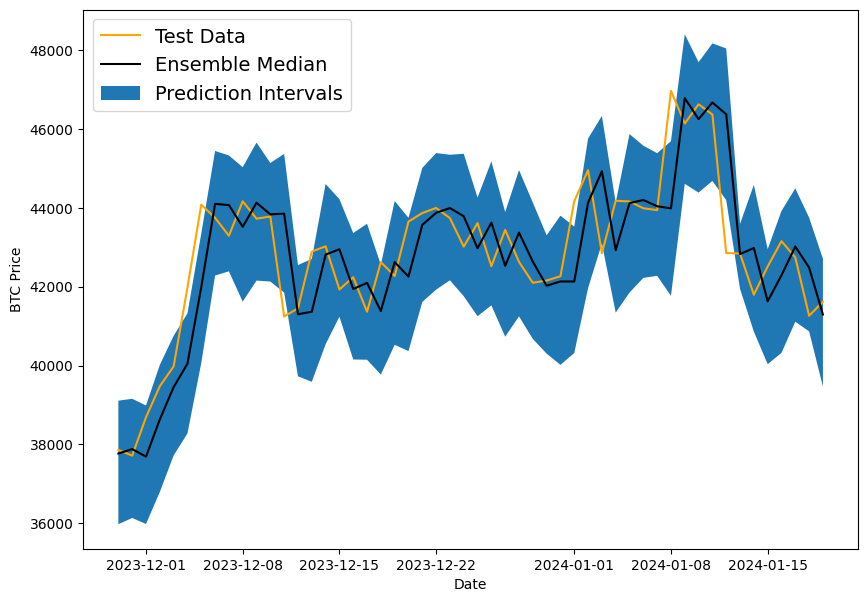

In [152]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 700
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "orange", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmm...

So far all of our models predicitons have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑**Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty
* https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predictef on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [153]:
HORIZON = 1
WINDOW_SIZE = 7

In [154]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [155]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-01-15,42511.968750,6.25,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469,46970.503906
2024-01-16,43154.945313,6.25,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344,46139.730469
2024-01-17,42742.652344,6.25,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938,46627.777344
2024-01-18,41262.058594,6.25,42742.652344,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969,46368.585938
2024-01-19,41618.406250,6.25,41262.058594,42742.652344,43154.945313,42511.968750,41796.269531,42842.382813,42853.167969


In [156]:
# Train model on the entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(3756, 3756)

In [157]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [158]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [159]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [160]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOS_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [191]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future=INTO_FUTURE, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-window_size:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(into_future):
    # if _ == 0:
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecast on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    # else:
    #   # Retrain model
    #   model.fit(tf.expand_dims(last_window, axis=0),
    #             tf.expand_dims(future_pred, axis=0),
    #             epochs=1,
    #             verbose=0)
      # # Predict on the last window then append it again, again, again (our model will eventually start to make forecast on its own forecasts)
      # future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our make_future_forecast() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

> As it is, the make_future_forecasts() function skips the retraining of a model part.

In [192]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [42842.382813 41796.269531 42511.96875  43154.945313 42742.652344
 41262.058594 41618.40625 ] -> Prediction: 42965.67578125

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [41796.269531   42511.96875    43154.945313   42742.652344
 41262.058594   41618.40625    42965.67578125] -> Prediction: 42509.18359375

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [42511.96875    43154.945313   42742.652344   41262.058594
 41618.40625    42965.67578125 42509.18359375] -> Prediction: 42867.8046875

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [43154.945313   42742.652344   41262.058594   41618.40625
 42965.67578125 42509.18359375 42867.8046875 ] -> Prediction: 42955.03515625

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [42742.652344   41262.058594   41618.40625    42965.67578125
 42509.18359375 42867.8046875  42955.03515625] -> Prediction: 424

### Plot future forecasts

In [193]:
len(future_forecast)

14

In [194]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date

  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [195]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2024-01-19 00:00:00')

In [196]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23',
       '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
       '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
       '2024-02-01', '2024-02-02'], dtype='datetime64[D]')

In [197]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22',
        '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
        '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30',
        '2024-01-31', '2024-02-01', '2024-02-02'], dtype='datetime64[D]'),
 array([41618.406, 42965.676, 42509.184, 42867.805, 42955.035, 42420.582,
        42061.473, 42567.44 , 43158.19 , 42925.293, 43032.59 , 42957.02 ,
        42691.605, 42773.23 , 43145.457], dtype=float32))

Text(0, 0.5, 'BTC Price')

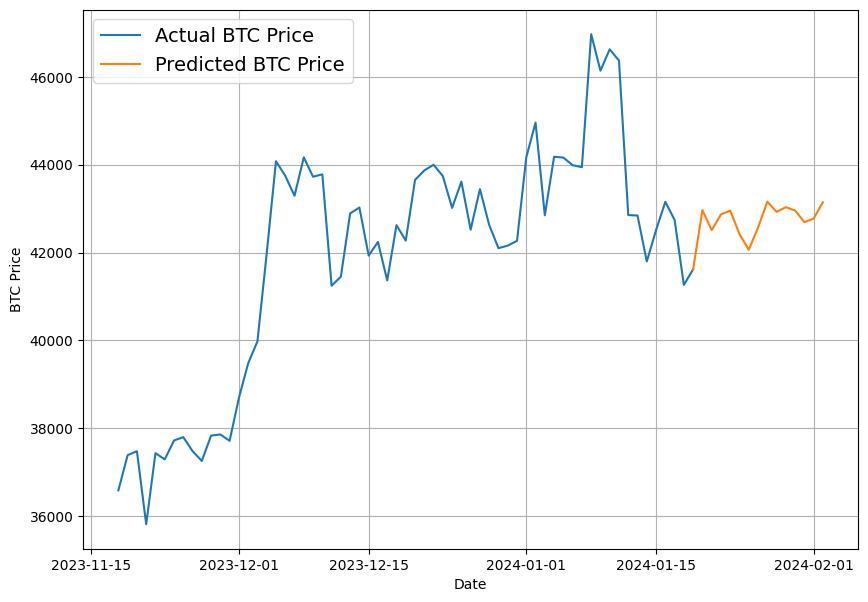

In [198]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=3700, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")
plt.xlabel("Date")
plt.ylabel("BTC Price")

 ## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [202]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [203]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[46627.777344,
 46368.585938,
 42853.167969,
 42842.382813,
 41796.269531,
 42511.96875,
 43154.945313,
 42742.652344,
 41262.058594,
 416.1840625]

In [204]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2024-01-10T00:00:00.000000000', '2024-01-11T00:00:00.000000000',
       '2024-01-12T00:00:00.000000000', '2024-01-13T00:00:00.000000000',
       '2024-01-14T00:00:00.000000000', '2024-01-15T00:00:00.000000000',
       '2024-01-16T00:00:00.000000000', '2024-01-17T00:00:00.000000000',
       '2024-01-18T00:00:00.000000000', '2024-01-19T00:00:00.000000000'],
      dtype='datetime64[ns]')

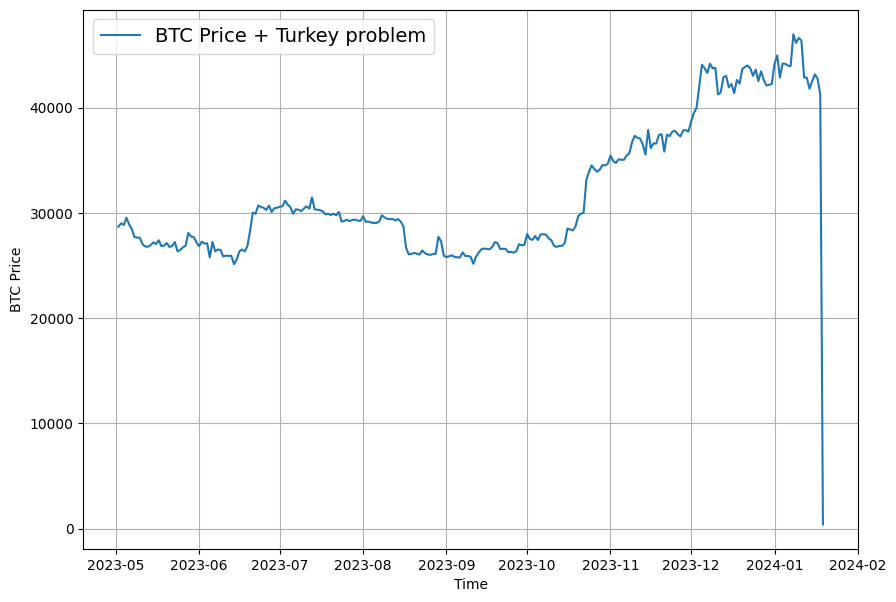

In [207]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 start=3500,
                 format="-",
                 label="BTC Price + Turkey problem")

In [208]:
HORIZON = 1
WINDOW_SIZE = 7

In [209]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows,
                                                          full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(3004, 752, 3004, 752)

In [210]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
# # Clone model_1 architecture for turkey model and fit the turkey model on the turkey data
# model_10 = tf.keras.Sequential([
#     layers.Dense(128, activation="relu"),
#     layers.Dense(HORIZON)
# ])
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(model_name=turkey_model.name)])

In [212]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 3ms/step - loss: 642.7936


642.7935791015625

In [213]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 7ms/step - loss: 617.3431


617.3431396484375

In [214]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47958.22 , 46581.63 , 47025.16 , 46279.285, 47561.152, 47237.426,
       46519.508, 46029.465, 43714.605, 43237.508], dtype=float32)>

In [215]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                               y_pred=turkey_preds)
turkey_results

{'mae': 9795.399,
 'mse': 149982800.0,
 'rmse': 11864.074,
 'mape': 45.101463,
 'mase': 16.00633}

In [216]:
model_1_results

{'mae': 575.11896,
 'mse': 798415.1,
 'rmse': 893.5408,
 'mape': 1.95977,
 'mase': 1.0305754}

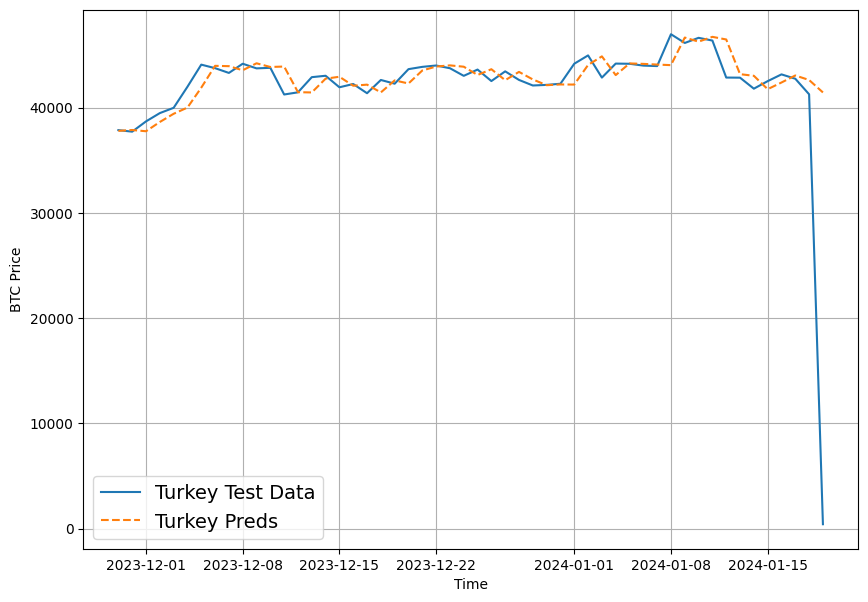

In [218]:
plt.figure(figsize=(10, 7))
offset=700
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 format="--",
                 label="Turkey Preds", start=offset);

## Compare models

In [219]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results

,mae,mse,rmse,mape,mase
naive_model,558.835571,7.614436e+05,872.607361,1.903478,1.001397
model_1_dense_w7_h1,575.118958,7.984151e+05,893.540771,1.959770,1.030575
model_2_dense_w30_h1,602.497925,8.590037e+05,926.824524,2.071978,1.083342
model_3_dense_w30_h7,1220.942383,3.400064e+06,1410.792847,4.226152,2.195239
model_4_CONV1D,570.879761,7.909551e+05,889.356506,1.947022,1.022979
model_5_LSTM,607.160339,8.582124e+05,926.397583,2.066881,1.087991
model_6_multivariate,565.438354,7.784688e+05,882.308777,1.927169,1.013228
model_7_NBEATS,557.658752,7.649245e+05,874.599609,1.901460,0.999288
model_8_ensemble,563.627014,7.689812e+05,876.915771,1.918266,1.009983
model_10_turkey,9795.399414,1.499828e+08,11864.074219,45.101463,16.006330


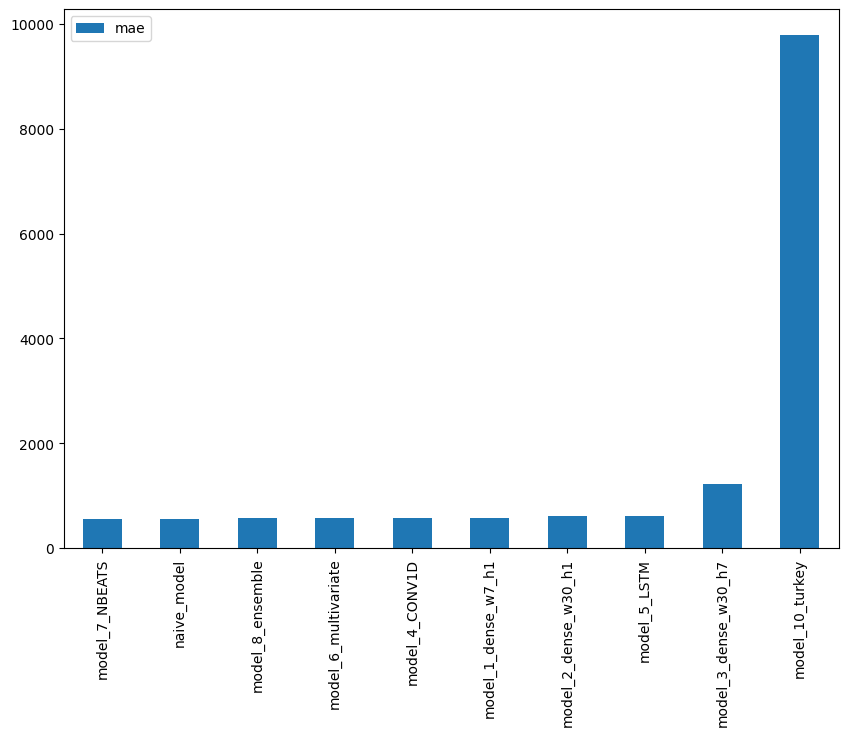

In [220]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar");